# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [19]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import pandas as pd
import requests
import io

 
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"

 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

 
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("¡Página descargada con éxito!")
    html_content = response.text
    
     
     
    all_tables = pd.read_html(io.StringIO(html_content), flavor='lxml')
    # ----------------------------------------
    
     
    df = all_tables[0]
    
     
    print("--- Tabla de canciones ---")
    print(df.head())  
    
     
    df.to_csv("most-streamed-songs.csv", index=False)
    print("\n¡Archivo 'most-streamed-songs.csv' guardado exitosamente!")
    
else:
    print(f"Error al descargar la página. Código: {response.status_code}")

¡Página descargada con éxito!
--- Tabla de canciones ---
  Rank               Song                 Artist(s) Streams (billions)  \
0    1  "Blinding Lights"                The Weeknd              7.738   
1    2     "Shape of You"                Ed Sheeran              4.771   
2    3  "Sweater Weather"         The Neighbourhood              4.384   
3    4          "Starboy"  The Weeknd and Daft Punk              4.367   
4    5        "As It Was"              Harry Styles              4.250   

        Release date Ref.  
0   29 November 2019  [1]  
1     6 January 2017  [2]  
2    3 December 2012  [3]  
3  21 September 2016  [4]  
4       1 April 2022  [5]  

¡Archivo 'most-streamed-songs.csv' guardado exitosamente!


In [25]:
import pandas as pd

 
df = pd.read_csv("most-streamed-songs.csv")

 
print("Columnas encontradas en el CSV:")
print(df.columns.tolist())

 
print("\nPrimeras filas del DataFrame:")
print(df.head())

Columnas encontradas en el CSV:
['Rank', 'Song', 'Artist(s)', 'Streams (billions)', 'Release date', 'Ref.']

Primeras filas del DataFrame:
  Rank               Song                 Artist(s) Streams (billions)  \
0    1  "Blinding Lights"                The Weeknd              7.738   
1    2     "Shape of You"                Ed Sheeran              4.771   
2    3  "Sweater Weather"         The Neighbourhood              4.384   
3    4          "Starboy"  The Weeknd and Daft Punk              4.367   
4    5        "As It Was"              Harry Styles              4.250   

        Release date Ref.  
0   29 November 2019  [1]  
1     6 January 2017  [2]  
2    3 December 2012  [3]  
3  21 September 2016  [4]  
4       1 April 2022  [5]  


/tmp/ipykernel_3373/3759810116.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_streams, y='Song', data=top10, palette='viridis')


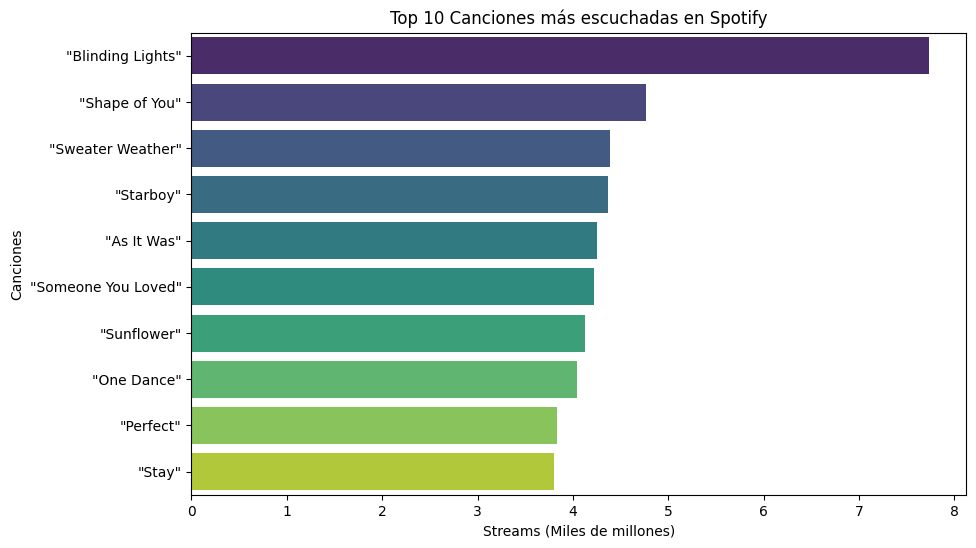

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
df = pd.read_csv("most-streamed-songs.csv")

 
columna_streams = 'Streams (billions)'

 
df[columna_streams] = pd.to_numeric(df[columna_streams], errors='coerce')

 
plt.figure(figsize=(10, 6))
top10 = df.nlargest(10, columna_streams)
sns.barplot(x=columna_streams, y='Song', data=top10, palette='viridis')

plt.title('Top 10 Canciones más escuchadas en Spotify')
plt.xlabel('Streams (Miles de millones)')
plt.ylabel('Canciones')
plt.show()

/tmp/ipykernel_3373/2574378551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_streams, y=columna_artista, data=top_artistas, palette='magma')


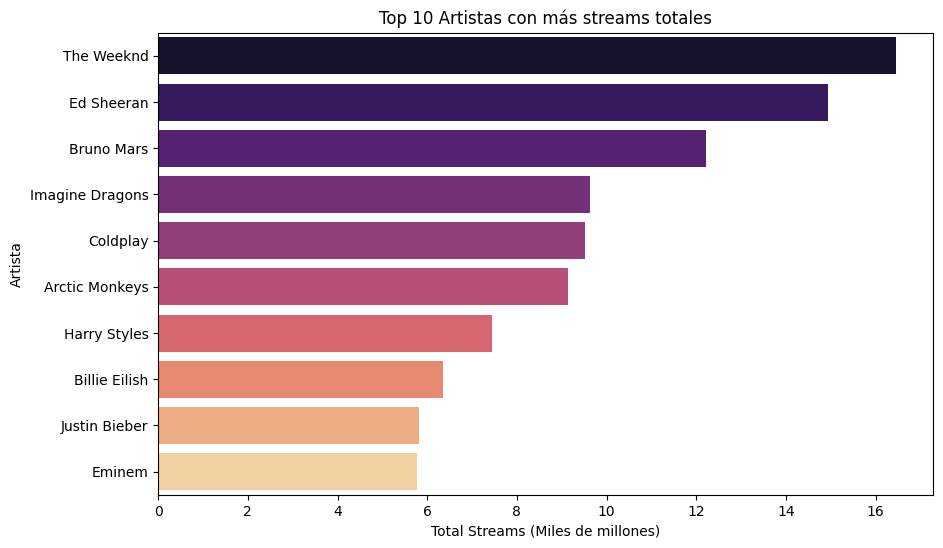

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
df = pd.read_csv("most-streamed-songs.csv")

 
columna_streams = 'Streams (billions)'
columna_artista = 'Artist(s)'  

 
df[columna_streams] = pd.to_numeric(df[columna_streams], errors='coerce')

 
top_artistas = df.groupby(columna_artista)[columna_streams].sum().nlargest(10).reset_index()

 
plt.figure(figsize=(10, 6))
sns.barplot(x=columna_streams, y=columna_artista, data=top_artistas, palette='magma')

plt.title('Top 10 Artistas con más streams totales')
plt.xlabel('Total Streams (Miles de millones)')
plt.ylabel('Artista')
plt.show()

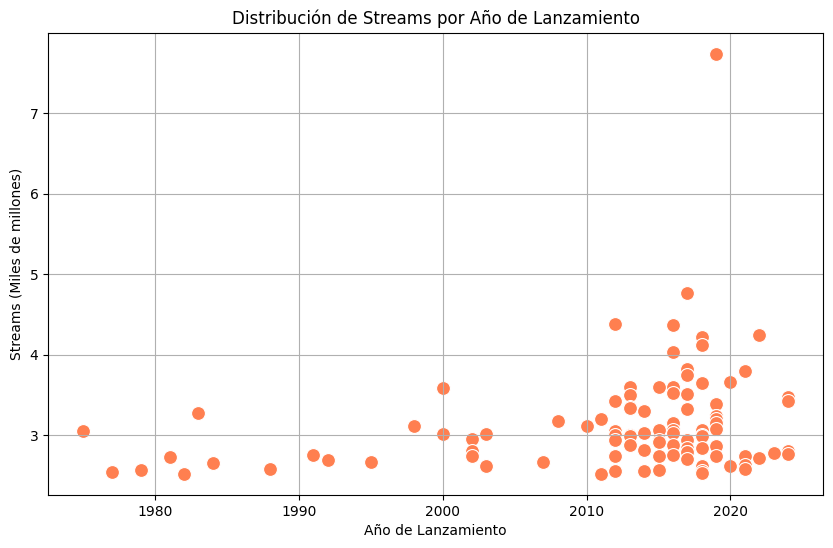

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
df = pd.read_csv("most-streamed-songs.csv")

 
columna_streams = 'Streams (billions)'
columna_fecha = 'Release date'

 
df[columna_streams] = pd.to_numeric(df[columna_streams], errors='coerce')

 
df['Year'] = df[columna_fecha].astype(str).str.strip().str[-4:]
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y=columna_streams, data=df, s=100, color='coral')

plt.title('Distribución de Streams por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Streams (Miles de millones)')
plt.grid(True)
plt.show()